In [3]:
import os
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [4]:
os.chdir('/Users/stevensuser/Library/CloudStorage/OneDrive-stevens.edu/PhD_research/BB')
ret_cds_df = pd.read_pickle("ret_cds_us_20nan_5_21.pkl")

In [5]:
os.chdir('/Users/stevensuser/Library/CloudStorage/OneDrive-stevens.edu/PhD_research/Qual')
fred_raw_df = pd.read_csv("fred_data.csv",index_col=0)

In [6]:
# match the dates
fred_raw_df.index = pd.to_datetime(fred_raw_df.index)
fred_df = fred_raw_df[fred_raw_df.index.isin(ret_cds_df.index)]

In [12]:
def cf_ts(ret_data, lag, ncf):
    kx = 0
    cf_dict  = {}
    print(len(ret_data.columns))
    
    for ix in range(2005,2022): # each year
        ret_cds_df1 = ret_data.loc[f"{2005+kx}-01-01": f"{2005+kx}-12-31",:] # same names through years        
        rw = (len(ret_cds_df1)-lag)
        
        # extract the common factor
        u_v, s_v, vt_v = np.linalg.svd(ret_cds_df1, full_matrices = False)
        plt.plot(s_v/np.sum(s_v))
            
        u_v_p = u_v[:, :ncf]
            
        # model dict per year
        cf_dict[f"{2005+kx}-01-01", f"{2005+kx}-12-31"]  = u_v_p#.to_numpy()
        
        kx += 1 # go to next year

    return cf_dict

189
189


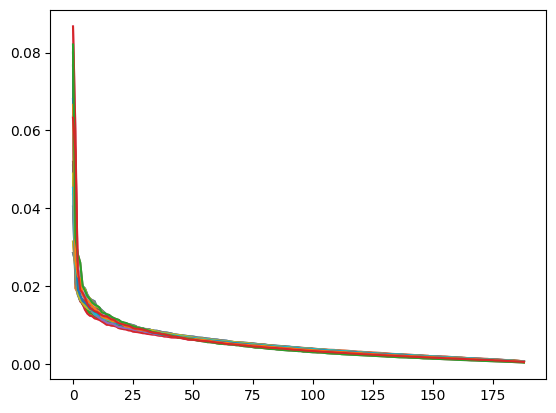

In [13]:
cf_20_dict = cf_ts(ret_cds_df, 1, 20)
cf_5_dict = cf_ts(ret_cds_df, 1, 5)

In [15]:
# 20 cf
cor_20_dict = {}
for kx in range(2022-2005):
    xx = cf_20_dict[f"{2005+kx}-01-01", f"{2005+kx}-12-31"]
    yy = fred_df[(fred_df.index >= f"{2005+kx}-01-01") & (fred_df.index <= f"{2005+kx}-12-31")]
    cor_20_dict[f"{2005+kx}"] = np.corrcoef(xx, yy, rowvar=False)

In [16]:
# 5 cf
cor_5_dict = {}
for kx in range(2022-2005):
    xx = cf_5_dict[f"{2005+kx}-01-01", f"{2005+kx}-12-31"]
    yy = fred_df[(fred_df.index >= f"{2005+kx}-01-01") & (fred_df.index <= f"{2005+kx}-12-31")]
    cor_5_dict[f"{2005+kx}"] = np.corrcoef(xx, yy, rowvar=False)

In [31]:
kx = 0
cor_20_dict[f"{2005+kx}"].min()

-0.07052425259321637

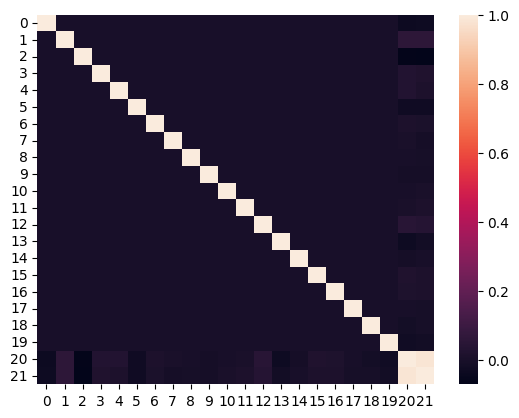

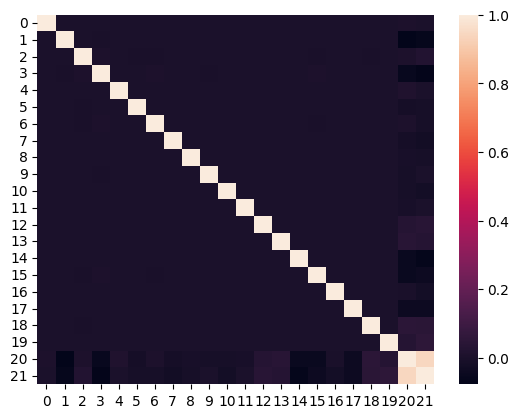

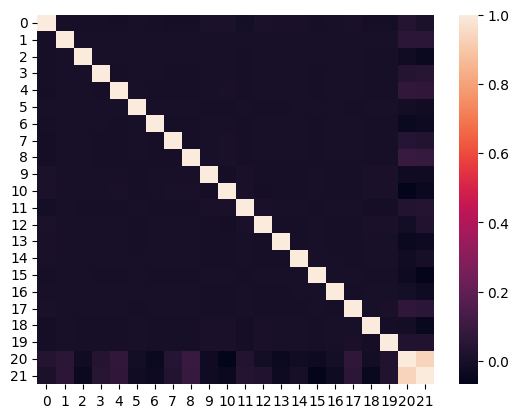

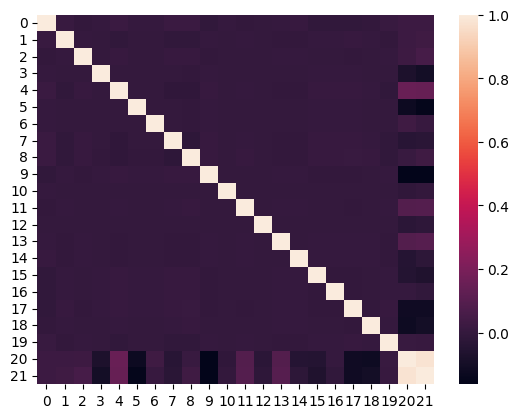

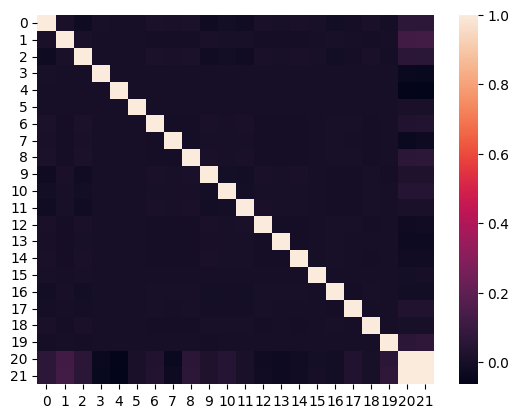

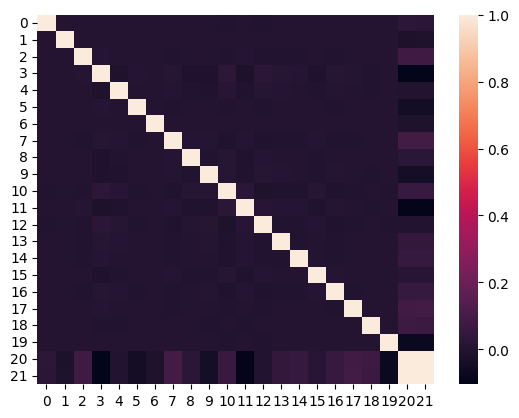

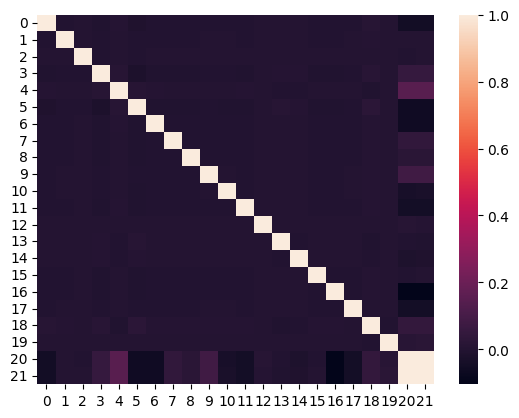

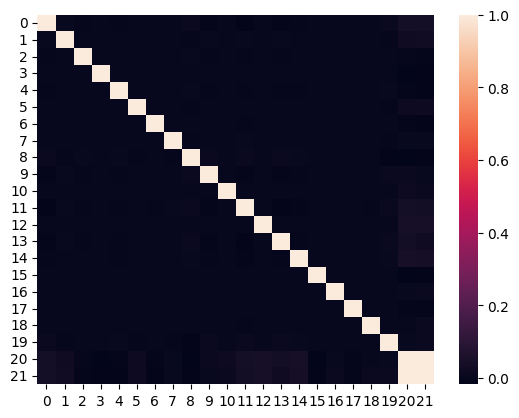

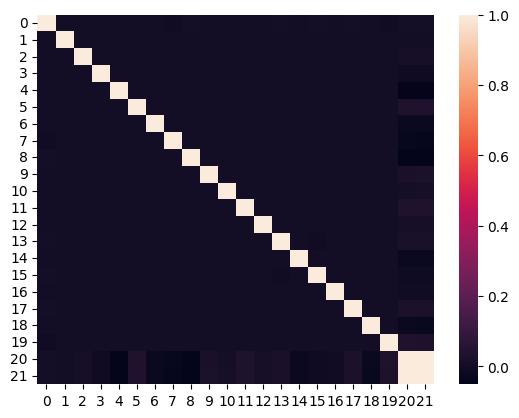

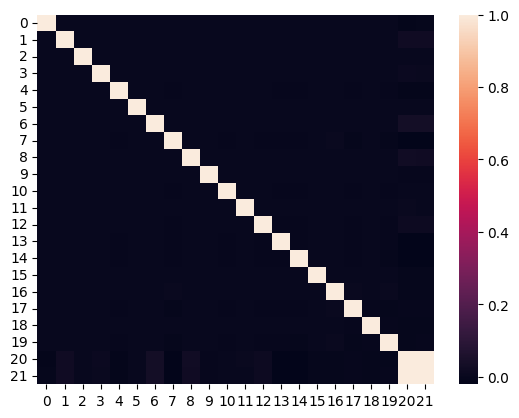

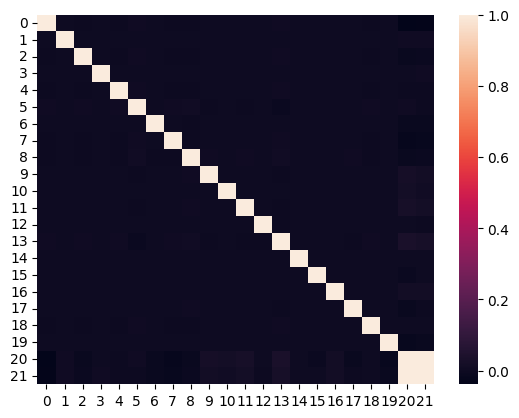

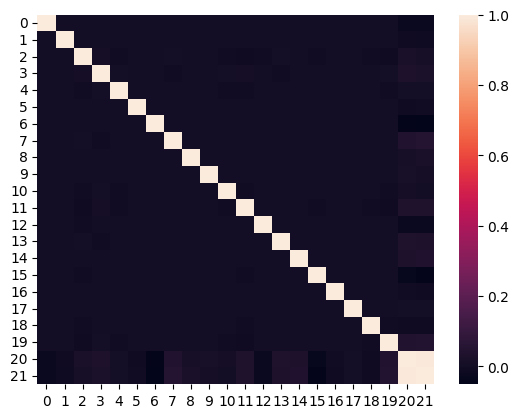

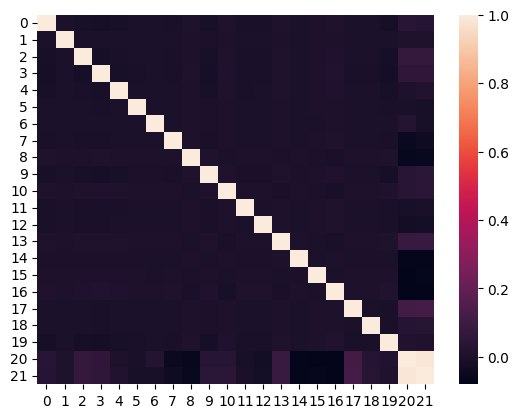

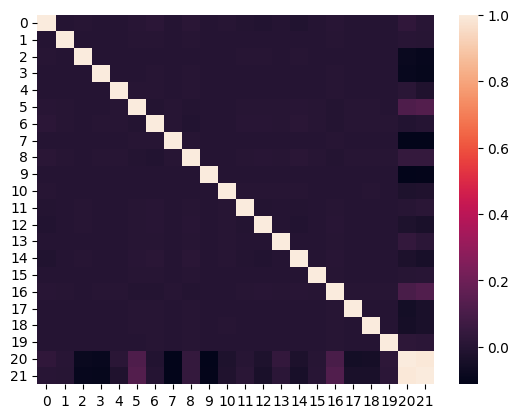

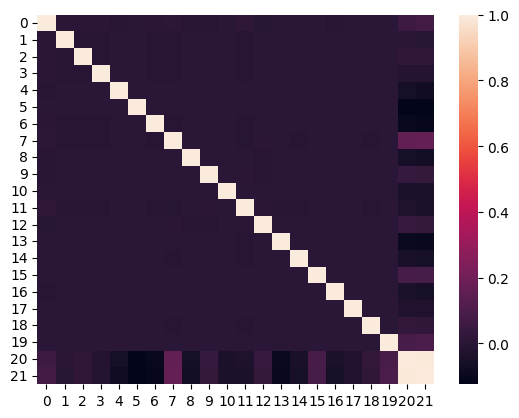

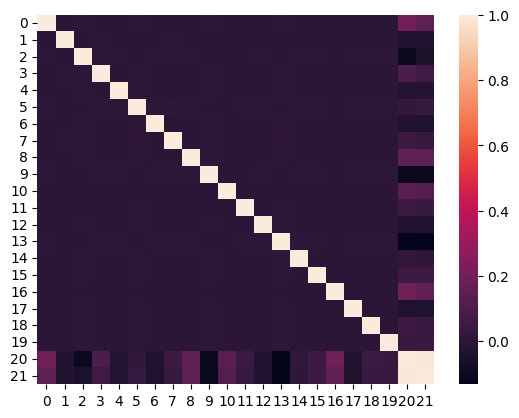

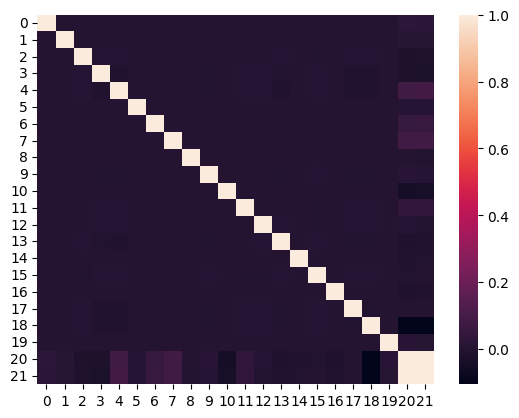

In [32]:
for kx in range(2022-2005):
    dataplot = sb.heatmap(cor_20_dict[f"{2005+kx}"])
    plt.show()

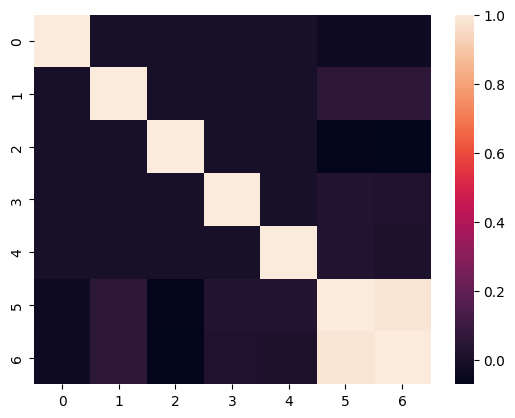

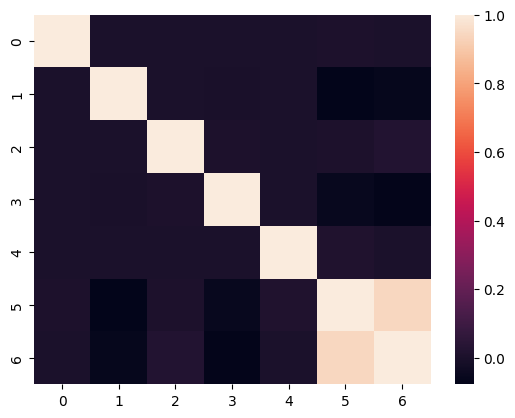

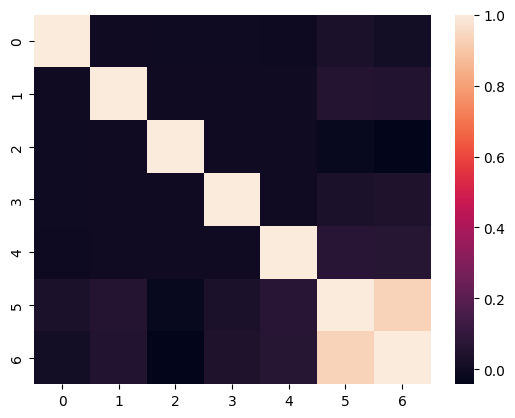

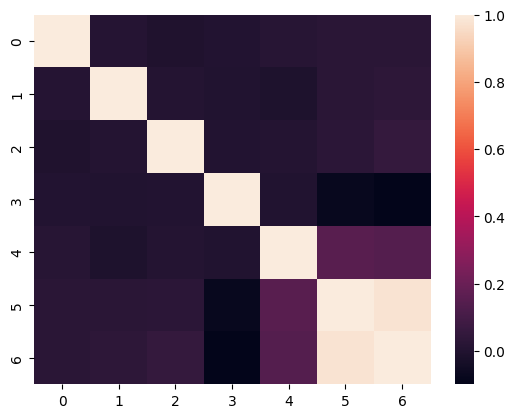

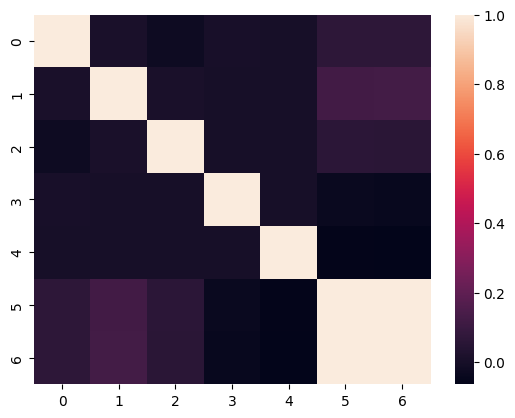

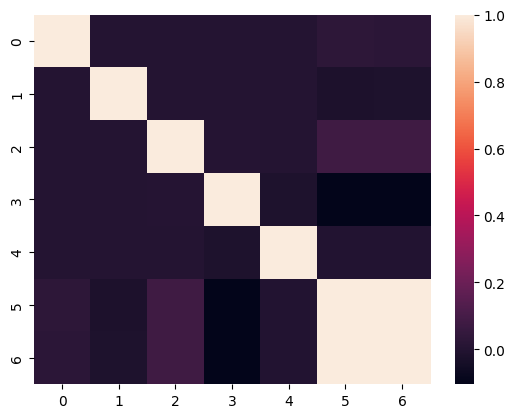

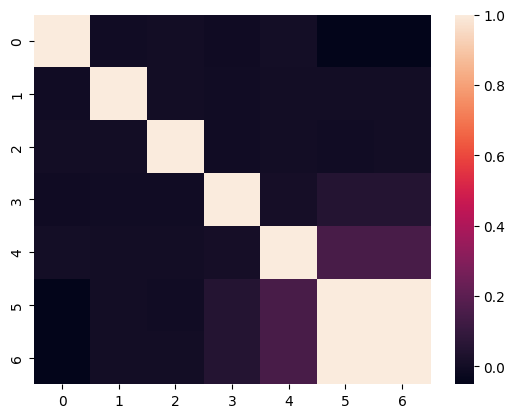

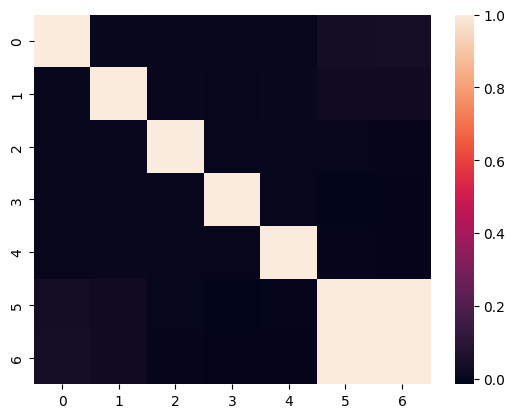

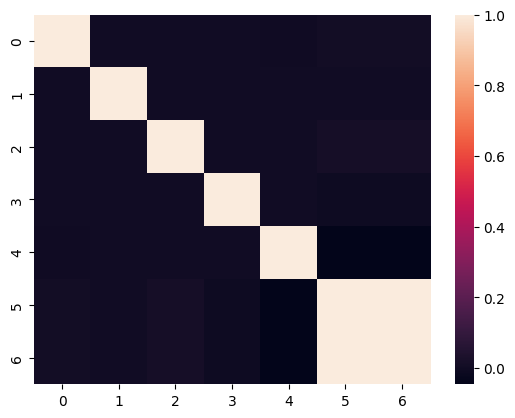

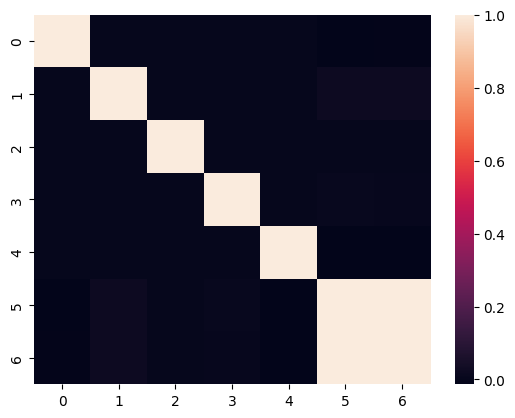

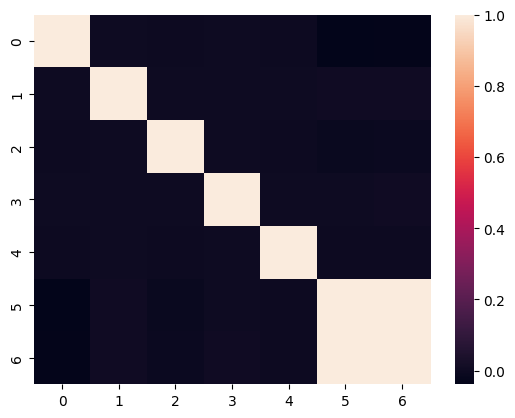

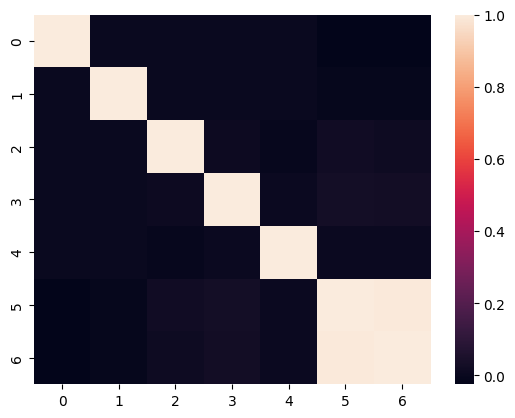

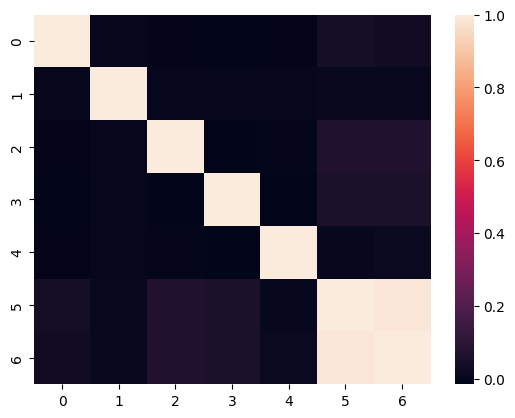

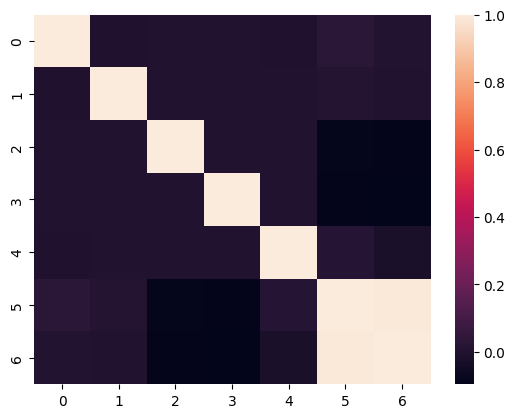

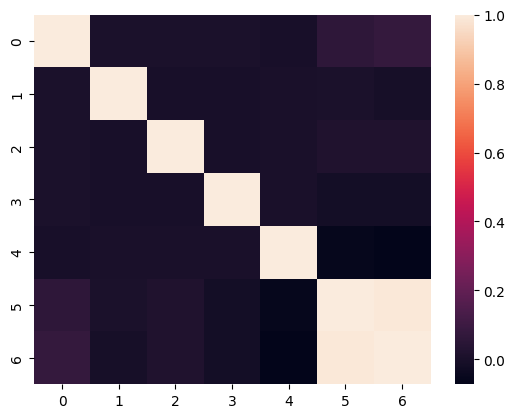

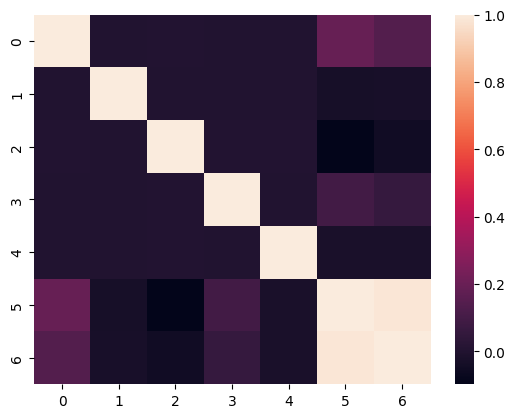

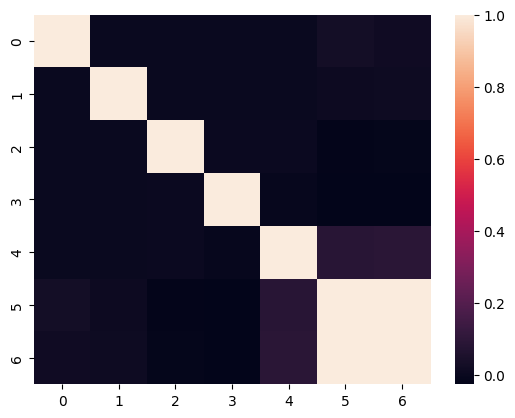

In [33]:
for kx in range(2022-2005):
    dataplot = sb.heatmap(cor_5_dict[f"{2005+kx}"])
    plt.show()